# ML Project 16

## Importing Libraries and Data

In [2]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#Model
#Değerlendirme metrikleri

In [4]:
exercise = pd.read_csv("exercise.csv")
calories = pd.read_csv("calories.csv")

print(f"exercise veri setinin boyutu {exercise.shape}", "\n", f"calories veri setinin boyutu {calories.shape}")

exercise veri setinin boyutu (15000, 8) 
 calories veri setinin boyutu (15000, 2)


In [5]:
exercise.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7


In [6]:
calories.head(3)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0


In [7]:
project_16 = pd.merge(exercise, calories, on = "User_ID", how = "inner")
project_16 = project_16.drop(columns = "User_ID", axis = 1)

In [8]:
project_16

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


## Analysing and Visualization Data (EDA)

### .info()

In [9]:
#.info()
project_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


### .shape

In [10]:
#.shape
project_16.shape

(15000, 8)

### .unique() and .nunique()

In [11]:
#.unique and .nunique()
project_16.select_dtypes(include = "object").nunique()

Gender    2
dtype: int64

In [12]:
project_16["Gender"].unique()

array(['male', 'female'], dtype=object)

### .value_counts()

In [13]:
project_16["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

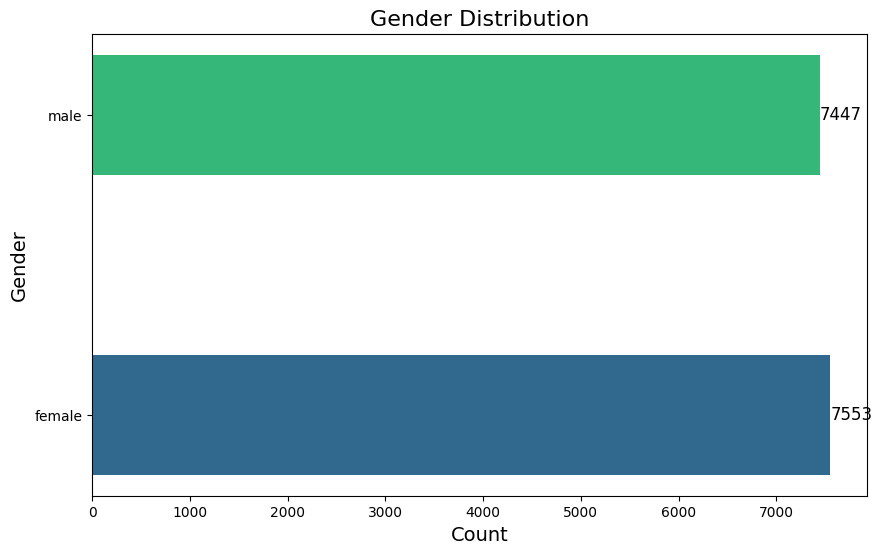

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# project_16["Gender"].value_counts() ifadesini bir değişkene atayalım
gender_counts = project_16["Gender"].value_counts()

# Barplot oluşturmak için Matplotlib'i kullanıyoruz
plt.figure(figsize=(10, 6))
bars = plt.barh(gender_counts.index, gender_counts.values, color=sns.color_palette('viridis', len(gender_counts)), height=0.4)

# Barların üzerine sayıları ekleyelim
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, int(width), va='center', fontsize=12)

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Gender', fontsize=14)

# Grafiği gösterelim
plt.show()


### Distplots of Numerical Features and .skew()

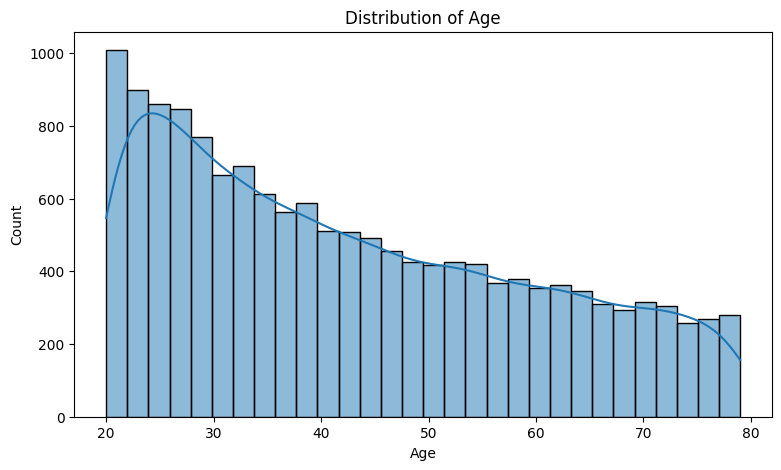

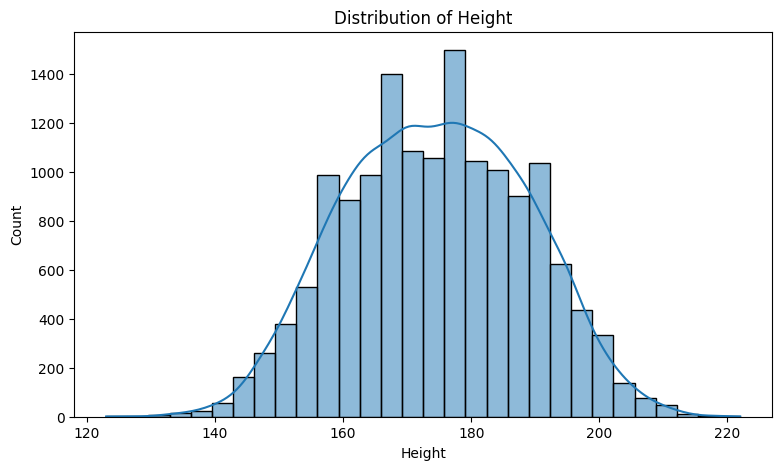

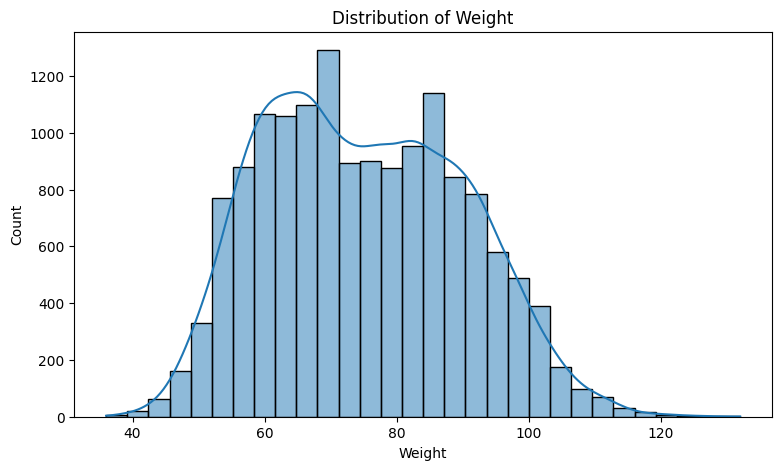

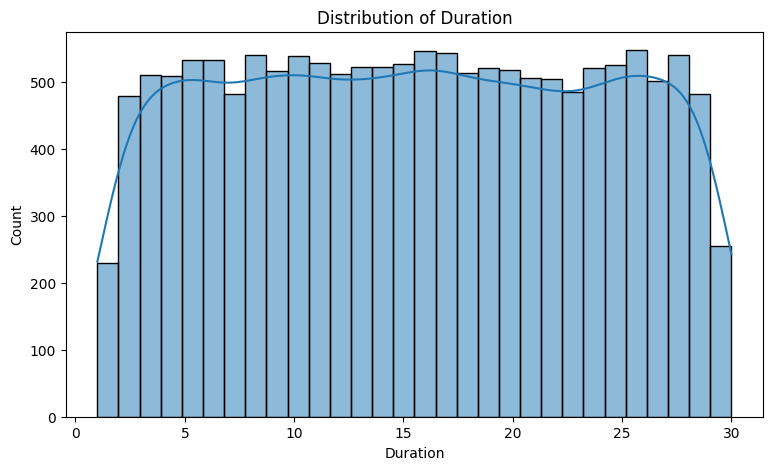

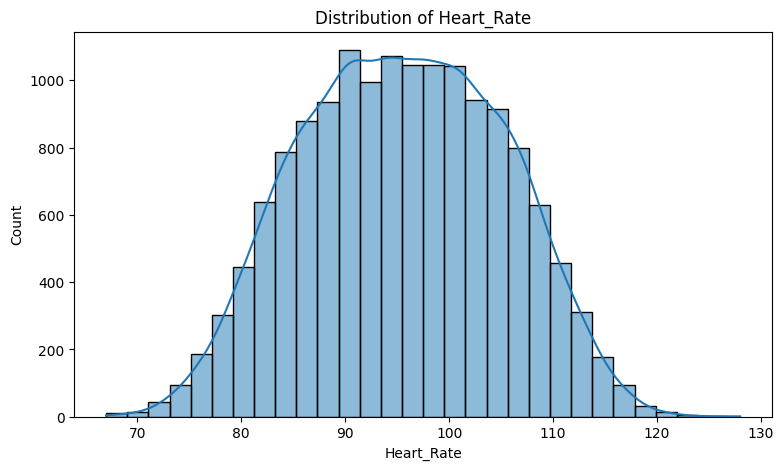

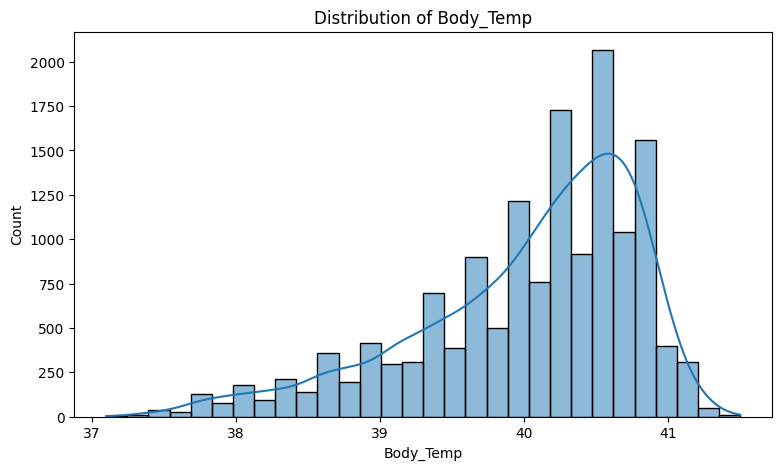

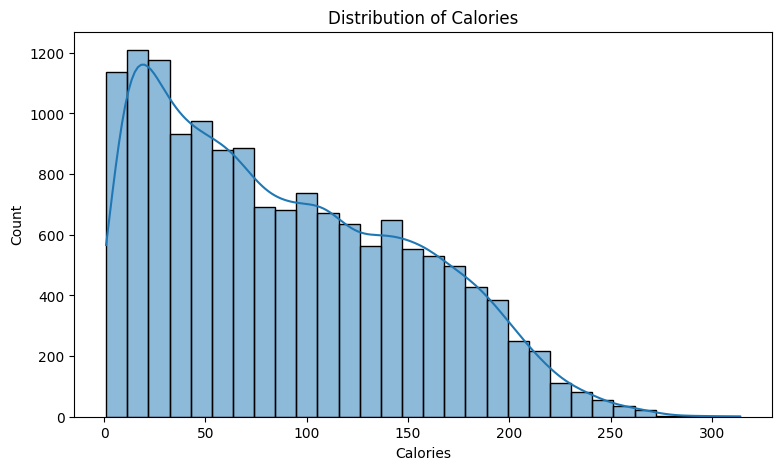

In [15]:
for column in project_16.select_dtypes(include = ["float64", "int64"]):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_16, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

In [16]:
#.skew()
print(project_16.select_dtypes(include = ["int64", "float64"]).skew(), "\n")
project_16.select_dtypes(include = ["int64", "float64"]).skew().mean()

Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64 



np.float64(0.02842197188126207)

### .isnull().sum()

In [17]:
project_16.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### .duplicated and .drop_duplicates()

In [18]:
project_16.duplicated().sum()

np.int64(1)

In [19]:
#Tekrar eden satır: 
project_16[project_16.duplicated()]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
12852,female,28,164.0,59.0,9.0,90.0,39.5,40.0


In [20]:
#Tekrar eden satırın temizlenmesi 
project_16.drop_duplicates()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


### .corr() and heatmap()

<Axes: >

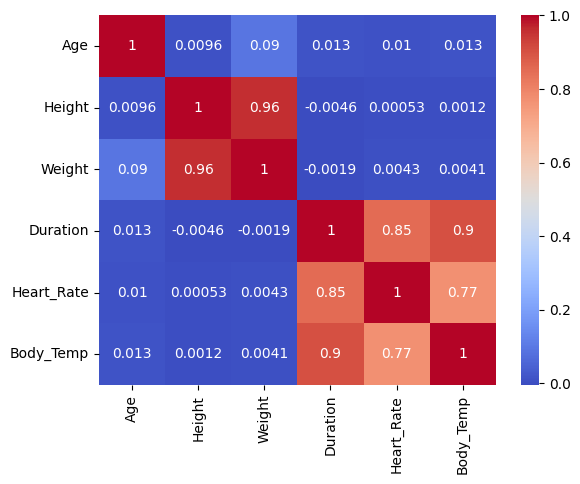

In [21]:
cor = project_16.select_dtypes(include = ["int64", "float64"]).drop(columns = "Calories", axis = 1).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

+ `Height - Weight` | `Duration - Heart_Rate`, `Duration - Body_Temp` | `Heart_Rate - Body_Temp` korelasyonları gözleniyor. Bu korelasyonlardan kurtulabilmek için feature engineering, PCA, VIF kontorlü gibi teknikleri veya modeli kurarken Ridge, Lasso gibi modelleri kullancağız. 

In [22]:
#Height ve Weight sütunlarını kullanarak 'Bmi' adlı sütunu oluşturma
#ve ardından bu iki sütunu veri setinden kaldırma: 
project_16["Height_cm"] = project_16["Height"]/100
project_16["Bmi"] = project_16['Weight'] / (project_16['Height_cm'] ** 2)
project_16 = project_16.drop(columns = ["Height", "Weight", "Height_cm"], axis = 1)

In [23]:
project_16.head(2)

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi
0,male,68,29.0,105.0,40.8,231.0,26.038781
1,female,20,14.0,94.0,40.3,66.0,21.773842


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sayısal sütunları seçin
numeric_columns = project_16.select_dtypes(include=[np.number])

# VIF hesaplaması
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(len(numeric_columns.columns))]

print(vif_data)


      Feature         VIF
0         Age   11.651619
1    Duration   81.380276
2  Heart_Rate  641.364489
3   Body_Temp  920.009317
4    Calories   82.842986
5         Bmi  261.621932


+ Bütün sütunların VIF değeri 10'dan büyük olduğu için herhangi bir özelliği veri setinden çıkartmak yerine, ilerleyen adımlarda StandardScaler kullandıktan sonra PCA yöntemini uygulayacağız. 

## LabelEncoder on `Gender` Column

In [26]:
encoder = LabelEncoder()
project_16["Gender"] = encoder.fit_transform(project_16["Gender"].astype("str"))

In [27]:
project_16.head(3)

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi
0,1,68,29.0,105.0,40.8,231.0,26.038781
1,0,20,14.0,94.0,40.3,66.0,21.773842
2,1,69,5.0,88.0,38.7,26.0,24.655910


## Feature Scaling with `StandardScaler` and `PCA` but before, Splitting data 

### Splitting Data 

In [28]:
train_df, test_df = train_test_split(project_16, test_size=0.2, random_state=42)
print(f"Train setinin boyutu: {train_df.shape}", "\n", f"Test setinin boyutu: {test_df.shape}")


Train setinin boyutu: (12000, 7) 
 Test setinin boyutu: (3000, 7)


In [29]:
train_df.head(2)

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi
9839,1,37,7.0,81.0,39.5,17.0,24.031709
9680,1,23,26.0,110.0,40.5,167.0,22.879684


In [30]:
test_df.head(2)

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi
11499,0,45,26.0,107.0,40.6,173.0,21.926126
6475,1,21,29.0,111.0,40.5,189.0,25.737081


### Train ve Test Setlerine PCA 

In [ ]:
"""
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Veriyi standartlaştırma
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_16[['Duration', 'Heart_Rate', 'Body_Temp', 'Bmi']])

# PCA uygulama
pca = PCA(n_components=2)  # 2 bileşen seçerek başlayabilirsiniz
principal_components = pca.fit_transform(scaled_data)

# Yeni özellikleri veri çerçevesine ekleme
pca_16['PCA1'] = principal_components[:, 0]
pca_16['PCA2'] = principal_components[:, 1]

#PCA1 ve PCA2 sütunlarının olduğu veri setini döndürme
print(pca_16.head(3))

# Orijinal değişkenleri çıkarma
pca_16 = pca_16.drop(columns=['Duration', 'Heart_Rate', 'Body_Temp', 'Bmi'])

# Yeni VIF hesaplaması
print("\n")
vif_data = pd.DataFrame()
vif_data["Feature"] = pca_16.columns
vif_data["VIF"] = [variance_inflation_factor(pca_16.values, i) for i in range(len(pca_16.columns))]

print(vif_data)
"""

In [31]:
from sklearn.decomposition import PCA
pca_16_train = train_df
pca_16_test = test_df

#Veriyi standartlaştırma
std_scaler = StandardScaler()
train_std = std_scaler.fit_transform(pca_16_train[['Duration', 'Heart_Rate', 'Body_Temp', 'Bmi']])
test_std = std_scaler.transform(pca_16_test[['Duration', 'Heart_Rate', 'Body_Temp', 'Bmi']])

#PCA uygulama
pca = PCA(n_components=2) # 2 bileşen seçerek başlayalım 
train_pca = pca.fit_transform(train_std)
test_pca = pca.transform(test_std)

#PCA'lı Train ve Test setlerini oluşturup
#Çoklu bağlantı sorunu olan sütunların çıkarılması
pca_16_train["PCA1"] = train_pca[:, 0]
pca_16_train["PCA2"] = train_pca[:, 1]
pca_16_train = pca_16_train.drop(columns=['Duration', 'Heart_Rate', 'Body_Temp', 'Bmi'])

pca_16_test["PCA1"] = test_pca[:, 0]
pca_16_test["PCA2"] = test_pca[:, 1]
pca_16_test = pca_16_test.drop(columns=['Duration', 'Heart_Rate', 'Body_Temp', 'Bmi'])


In [32]:
pca_16_train.head(3)

,Gender,Age,Calories,PCA1,PCA2
9839,1,37,17.0,-1.849167,-0.179788
9680,1,23,167.0,1.949165,-0.961969
7093,1,33,40.0,-0.639631,-0.534332


In [33]:
pca_16_test.head(3)

,Gender,Age,Calories,PCA1,PCA2
11499,0,45,173.0,1.837800,-1.575005
6475,1,21,189.0,2.247304,0.866651
13167,1,58,53.0,-0.655219,0.337453


## Separating Data 

In [34]:
X_train = pca_16_train.drop(columns="Calories", axis = 1)
y_train = pca_16_train["Calories"]

X_test = pca_16_test.drop(columns="Calories", axis = 1)
y_test = pca_16_test["Calories"]

In [35]:
print(f"X_train boyutu: {X_train.shape}", "\n", f"X_test boyutu: {X_test.shape}",
      "\n", f"y_train boyutu: {y_train.shape}", "\n", f"y_test boyutu: {y_test.shape}")

X_train boyutu: (12000, 4) 
 X_test boyutu: (3000, 4) 
 y_train boyutu: (12000,) 
 y_test boyutu: (3000,)


## Fitting Model and Compare with DummyRegressor on `pca_16` Dataset

In [36]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy = "mean").fit(X_train, y_train)

In [37]:
print("DummyRegressor'un Test Setindeki Skoru:", dummy.score(X_test, y_test))

DummyRegressor'un Test Setindeki Skoru: -0.0012218149445957227


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [44]:
regression_models = {"Decision Tree": DecisionTreeRegressor(),
                   "Random Forest": RandomForestRegressor(),
                   "Gradient Boosting": GradientBoostingRegressor(),
                   "Ada Boost": AdaBoostRegressor(),
                   "KNN": KNeighborsRegressor(),
                   "Linear Regression": LinearRegression(),
                   "Lasso Regression": Lasso(),
                   "Ridge Regression": Ridge(),
                   "Linear SVR": SVR(kernel = "linear"),
                   "RBF SVR": SVR(kernel = "rbf"),
                   "Polynomial SVR": SVR(kernel = "poly"),
                    "XG Boost": XGBRegressor()}

In [47]:
model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    start_time = time.time()
    reg.fit(X_train, y_train)
    end_time = time.time()
    predictions = reg.predict(X_test)
    score_train = reg.score(X_train, y_train)
    score_test = reg.score(X_test, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}")
    print(f"Eğitim Süresi: {end_time - start_time}", "\n")

Decision Tree Train setindeki doğruluk: 1.0
Decision Tree Test setindeki doğruluk: 0.9701263059112104
Decision Tree MSE Skoru: 120.564
Decision Tree R^2 Skoru: 0.9701263059112104
Eğitim Süresi: 0.06360554695129395 

Random Forest Train setindeki doğruluk: 0.9976121646599211
Random Forest Test setindeki doğruluk: 0.984236676145443
Random Forest MSE Skoru: 63.61748806666666
Random Forest R^2 Skoru: 0.984236676145443
Eğitim Süresi: 4.332284212112427 

Gradient Boosting Train setindeki doğruluk: 0.9859258061203557
Gradient Boosting Test setindeki doğruluk: 0.9857640698161675
Gradient Boosting MSE Skoru: 57.453245707823484
Gradient Boosting R^2 Skoru: 0.9857640698161675
Eğitim Süresi: 1.5647306442260742 

Ada Boost Train setindeki doğruluk: 0.9690143072488652
Ada Boost Test setindeki doğruluk: 0.9698027589037996
Ada Boost MSE Skoru: 121.86976825502552
Ada Boost R^2 Skoru: 0.9698027589037996
Eğitim Süresi: 0.5266923904418945 

KNN Train setindeki doğruluk: 0.9817207448146285
KNN Test setinde

+ En uygun modelin **XGBoost** olduğu görülüyor. Bu modeli, uygulamada kullanmak için tekrar oluşturalım. 

### XGBoostRegressor Modelinin Yeniden Kurulması

In [48]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
xg_pred = xgboost.predict(X_test)


print(f"XGBRegressor'un Train setindeki doğruluk: {xgboost.score(X_train, y_train)}")
print(f"XGBRegressor'un Test setindeki doğruluk: {xgboost.score(X_test, y_test)}")
print(f"XGBRegressor'un MSE Skoru: {mean_squared_error(y_test, xg_pred)}")
print(f"XGBRegressor'un R^2 Skoru: {r2_score(y_test, xg_pred)}")

XGBRegressor'un Train setindeki doğruluk: 0.9925899629580257
XGBRegressor'un Test setindeki doğruluk: 0.9847067192693061
XGBRegressor'un MSE Skoru: 61.72049203340056
XGBRegressor'un R^2 Skoru: 0.9847067192693061
